In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, LeaveOneOut, cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, Matern, DotProduct
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from plotfunc import plot_result, cross_validate_and_plot, plot_learning_curve, plot_with_err

import seaborn as sns

In [2]:
lo = LeaveOneOut()

In [3]:
data = pd.read_csv('data_tc.csv')

In [15]:
columns =  ['Fe', 'Cr', 'Ni', 'Mo',
       'Mn', 'C', 'Ti', 'Si', 'Nb', 'V', 'P', 'B', 'Al', 'N', 'S', 'Co', 'Cu',
       'W', 'As',  'HT stage 1 temperature',
       'HT stage 1 duration', 'HT stage 1 cooling', 'HT stage 2 temperature', 
        'HT stage 2 duration', 'HT stage 2 cooling']
y = data['ND HCP_A3#2']

<AxesSubplot: >

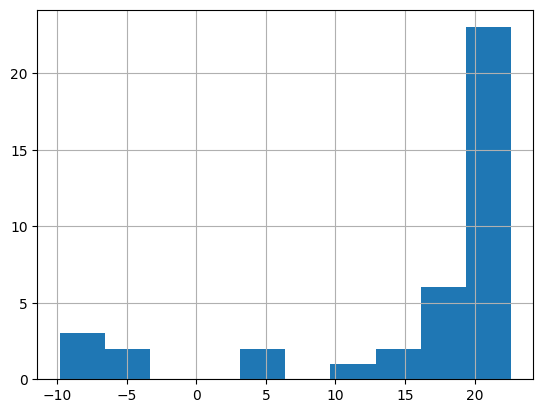

In [6]:
y.hist()

<AxesSubplot: >

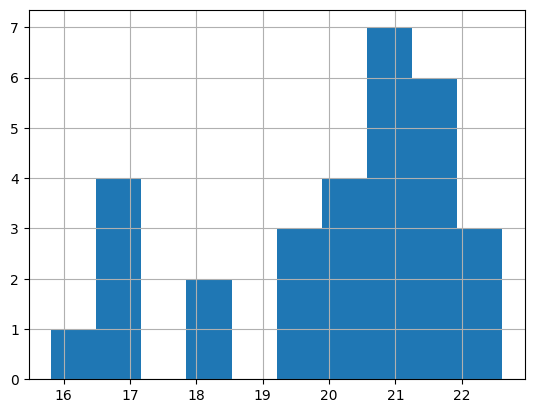

In [20]:
y[y>15].hist()

In [21]:
X = np.array(data[columns][y>15])
y = np.array(y[y>15])

# Lasso

In [22]:
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]
pipeline = Pipeline(steps)

params = {
    'lasso__alpha':np.linspace(1e-5, 1e1, 100)
}

grid = GridSearchCV(pipeline, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
[CV 1/30; 1/100] START lasso__alpha=1e-05.......................................
[CV 1/30; 1/100] END ......lasso__alpha=1e-05;, score=-10.350 total time=   0.0s
[CV 2/30; 1/100] START lasso__alpha=1e-05.......................................
[CV 2/30; 1/100] END .......lasso__alpha=1e-05;, score=-0.694 total time=   0.0s
[CV 3/30; 1/100] START lasso__alpha=1e-05.......................................
[CV 3/30; 1/100] END .......lasso__alpha=1e-05;, score=-0.035 total time=   0.0s
[CV 4/30; 1/100] START lasso__alpha=1e-05.......................................
[CV 4/30; 1/100] END .......lasso__alpha=1e-05;, score=-0.092 total time=   0.0s
[CV 5/30; 1/100] START lasso__alpha=1e-05.......................................
[CV 5/30; 1/100] END .......lasso__alpha=1e-05;, score=-0.014 total time=   0.0s
[CV 6/30; 1/100] START lasso__alpha=1e-05.......................................
[CV 6/30; 1/100] END ..lasso__alpha=1e-05;, 

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.128e+00, tolerance: 1.077e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.989e+00, tolerance: 1.084e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 25/30; 3/100] END lasso__alpha=0.20203000000000002;, score=-11.763 total time=   0.0s
[CV 26/30; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 26/30; 3/100] END lasso__alpha=0.20203000000000002;, score=-3.224 total time=   0.0s
[CV 27/30; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 27/30; 3/100] END lasso__alpha=0.20203000000000002;, score=-3.329 total time=   0.0s
[CV 28/30; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 28/30; 3/100] END lasso__alpha=0.20203000000000002;, score=-4.548 total time=   0.0s
[CV 29/30; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 29/30; 3/100] END lasso__alpha=0.20203000000000002;, score=-1.599 total time=   0.0s
[CV 30/30; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 30/30; 3/100] END lasso__alpha=0.20203000000000002;, score=-11.763 total time=   0.0s
[CV 1/30; 4/100] START lasso__alpha=0.30304000000000003....

[CV 3/30; 8/100] END lasso__alpha=0.7070799999999999;, score=-0.287 total time=   0.0s
[CV 4/30; 8/100] START lasso__alpha=0.7070799999999999..........................
[CV 4/30; 8/100] END lasso__alpha=0.7070799999999999;, score=-2.179 total time=   0.0s
[CV 5/30; 8/100] START lasso__alpha=0.7070799999999999..........................
[CV 5/30; 8/100] END lasso__alpha=0.7070799999999999;, score=-0.322 total time=   0.0s
[CV 6/30; 8/100] START lasso__alpha=0.7070799999999999..........................
[CV 6/30; 8/100] END lasso__alpha=0.7070799999999999;, score=-0.879 total time=   0.0s
[CV 7/30; 8/100] START lasso__alpha=0.7070799999999999..........................
[CV 7/30; 8/100] END lasso__alpha=0.7070799999999999;, score=-4.358 total time=   0.0s
[CV 8/30; 8/100] START lasso__alpha=0.7070799999999999..........................
[CV 8/30; 8/100] END lasso__alpha=0.7070799999999999;, score=-0.028 total time=   0.0s
[CV 9/30; 8/100] START lasso__alpha=0.7070799999999999...................

[CV 4/30; 11/100] END ....lasso__alpha=1.01011;, score=-2.250 total time=   0.0s
[CV 5/30; 11/100] START lasso__alpha=1.01011....................................
[CV 5/30; 11/100] END ....lasso__alpha=1.01011;, score=-0.354 total time=   0.0s
[CV 6/30; 11/100] START lasso__alpha=1.01011....................................
[CV 6/30; 11/100] END ....lasso__alpha=1.01011;, score=-0.987 total time=   0.0s
[CV 7/30; 11/100] START lasso__alpha=1.01011....................................
[CV 7/30; 11/100] END ....lasso__alpha=1.01011;, score=-4.358 total time=   0.0s
[CV 8/30; 11/100] START lasso__alpha=1.01011....................................
[CV 8/30; 11/100] END ....lasso__alpha=1.01011;, score=-0.030 total time=   0.0s
[CV 9/30; 11/100] START lasso__alpha=1.01011....................................
[CV 9/30; 11/100] END ....lasso__alpha=1.01011;, score=-0.257 total time=   0.0s
[CV 10/30; 11/100] START lasso__alpha=1.01011...................................
[CV 10/30; 11/100] END ...la

[CV 1/30; 14/100] END lasso__alpha=1.3131400000000002;, score=-0.850 total time=   0.0s
[CV 2/30; 14/100] START lasso__alpha=1.3131400000000002.........................
[CV 2/30; 14/100] END lasso__alpha=1.3131400000000002;, score=-0.102 total time=   0.0s
[CV 3/30; 14/100] START lasso__alpha=1.3131400000000002.........................
[CV 3/30; 14/100] END lasso__alpha=1.3131400000000002;, score=-0.335 total time=   0.0s
[CV 4/30; 14/100] START lasso__alpha=1.3131400000000002.........................
[CV 4/30; 14/100] END lasso__alpha=1.3131400000000002;, score=-2.250 total time=   0.0s
[CV 5/30; 14/100] START lasso__alpha=1.3131400000000002.........................
[CV 5/30; 14/100] END lasso__alpha=1.3131400000000002;, score=-0.354 total time=   0.0s
[CV 6/30; 14/100] START lasso__alpha=1.3131400000000002.........................
[CV 6/30; 14/100] END lasso__alpha=1.3131400000000002;, score=-0.987 total time=   0.0s
[CV 7/30; 14/100] START lasso__alpha=1.3131400000000002............

[CV 25/30; 16/100] END ..lasso__alpha=1.51516;, score=-12.214 total time=   0.0s
[CV 26/30; 16/100] START lasso__alpha=1.51516...................................
[CV 26/30; 16/100] END ...lasso__alpha=1.51516;, score=-5.408 total time=   0.0s
[CV 27/30; 16/100] START lasso__alpha=1.51516...................................
[CV 27/30; 16/100] END ...lasso__alpha=1.51516;, score=-0.483 total time=   0.0s
[CV 28/30; 16/100] START lasso__alpha=1.51516...................................
[CV 28/30; 16/100] END ...lasso__alpha=1.51516;, score=-3.029 total time=   0.0s
[CV 29/30; 16/100] START lasso__alpha=1.51516...................................
[CV 29/30; 16/100] END ...lasso__alpha=1.51516;, score=-3.016 total time=   0.0s
[CV 30/30; 16/100] START lasso__alpha=1.51516...................................
[CV 30/30; 16/100] END ..lasso__alpha=1.51516;, score=-12.214 total time=   0.0s
[CV 1/30; 17/100] START lasso__alpha=1.61617....................................
[CV 1/30; 17/100] END ....la

[CV 3/30; 20/100] END .....lasso__alpha=1.9192;, score=-0.335 total time=   0.0s
[CV 4/30; 20/100] START lasso__alpha=1.9192.....................................
[CV 4/30; 20/100] END .....lasso__alpha=1.9192;, score=-2.250 total time=   0.0s
[CV 5/30; 20/100] START lasso__alpha=1.9192.....................................
[CV 5/30; 20/100] END .....lasso__alpha=1.9192;, score=-0.354 total time=   0.0s
[CV 6/30; 20/100] START lasso__alpha=1.9192.....................................
[CV 6/30; 20/100] END .....lasso__alpha=1.9192;, score=-0.987 total time=   0.0s
[CV 7/30; 20/100] START lasso__alpha=1.9192.....................................
[CV 7/30; 20/100] END .....lasso__alpha=1.9192;, score=-4.358 total time=   0.0s
[CV 8/30; 20/100] START lasso__alpha=1.9192.....................................
[CV 8/30; 20/100] END .....lasso__alpha=1.9192;, score=-0.030 total time=   0.0s
[CV 9/30; 20/100] START lasso__alpha=1.9192.....................................
[CV 9/30; 20/100] END .....l

[CV 29/30; 23/100] END ...lasso__alpha=2.22223;, score=-3.016 total time=   0.0s
[CV 30/30; 23/100] START lasso__alpha=2.22223...................................
[CV 30/30; 23/100] END ..lasso__alpha=2.22223;, score=-12.214 total time=   0.0s
[CV 1/30; 24/100] START lasso__alpha=2.32324....................................
[CV 1/30; 24/100] END ....lasso__alpha=2.32324;, score=-0.850 total time=   0.0s
[CV 2/30; 24/100] START lasso__alpha=2.32324....................................
[CV 2/30; 24/100] END ....lasso__alpha=2.32324;, score=-0.102 total time=   0.0s
[CV 3/30; 24/100] START lasso__alpha=2.32324....................................
[CV 3/30; 24/100] END ....lasso__alpha=2.32324;, score=-0.335 total time=   0.0s
[CV 4/30; 24/100] START lasso__alpha=2.32324....................................
[CV 4/30; 24/100] END ....lasso__alpha=2.32324;, score=-2.250 total time=   0.0s
[CV 5/30; 24/100] START lasso__alpha=2.32324....................................
[CV 5/30; 24/100] END ....la

[CV 4/30; 27/100] END lasso__alpha=2.6262700000000003;, score=-2.250 total time=   0.0s
[CV 5/30; 27/100] START lasso__alpha=2.6262700000000003.........................
[CV 5/30; 27/100] END lasso__alpha=2.6262700000000003;, score=-0.354 total time=   0.0s
[CV 6/30; 27/100] START lasso__alpha=2.6262700000000003.........................
[CV 6/30; 27/100] END lasso__alpha=2.6262700000000003;, score=-0.987 total time=   0.0s
[CV 7/30; 27/100] START lasso__alpha=2.6262700000000003.........................
[CV 7/30; 27/100] END lasso__alpha=2.6262700000000003;, score=-4.358 total time=   0.0s
[CV 8/30; 27/100] START lasso__alpha=2.6262700000000003.........................
[CV 8/30; 27/100] END lasso__alpha=2.6262700000000003;, score=-0.030 total time=   0.0s
[CV 9/30; 27/100] START lasso__alpha=2.6262700000000003.........................
[CV 9/30; 27/100] END lasso__alpha=2.6262700000000003;, score=-0.257 total time=   0.0s
[CV 10/30; 27/100] START lasso__alpha=2.6262700000000003...........

[CV 1/30; 30/100] END .....lasso__alpha=2.9293;, score=-0.850 total time=   0.0s
[CV 2/30; 30/100] START lasso__alpha=2.9293.....................................
[CV 2/30; 30/100] END .....lasso__alpha=2.9293;, score=-0.102 total time=   0.0s
[CV 3/30; 30/100] START lasso__alpha=2.9293.....................................
[CV 3/30; 30/100] END .....lasso__alpha=2.9293;, score=-0.335 total time=   0.0s
[CV 4/30; 30/100] START lasso__alpha=2.9293.....................................
[CV 4/30; 30/100] END .....lasso__alpha=2.9293;, score=-2.250 total time=   0.0s
[CV 5/30; 30/100] START lasso__alpha=2.9293.....................................
[CV 5/30; 30/100] END .....lasso__alpha=2.9293;, score=-0.354 total time=   0.0s
[CV 6/30; 30/100] START lasso__alpha=2.9293.....................................
[CV 6/30; 30/100] END .....lasso__alpha=2.9293;, score=-0.987 total time=   0.0s
[CV 7/30; 30/100] START lasso__alpha=2.9293.....................................
[CV 7/30; 30/100] END .....l

[CV 19/30; 33/100] END ...lasso__alpha=3.23233;, score=-0.180 total time=   0.0s
[CV 20/30; 33/100] START lasso__alpha=3.23233...................................
[CV 20/30; 33/100] END ..lasso__alpha=3.23233;, score=-11.045 total time=   0.0s
[CV 21/30; 33/100] START lasso__alpha=3.23233...................................
[CV 21/30; 33/100] END ...lasso__alpha=3.23233;, score=-0.003 total time=   0.0s
[CV 22/30; 33/100] START lasso__alpha=3.23233...................................
[CV 22/30; 33/100] END ...lasso__alpha=3.23233;, score=-1.393 total time=   0.0s
[CV 23/30; 33/100] START lasso__alpha=3.23233...................................
[CV 23/30; 33/100] END ...lasso__alpha=3.23233;, score=-0.429 total time=   0.0s
[CV 24/30; 33/100] START lasso__alpha=3.23233...................................
[CV 24/30; 33/100] END ..lasso__alpha=3.23233;, score=-19.204 total time=   0.0s
[CV 25/30; 33/100] START lasso__alpha=3.23233...................................
[CV 25/30; 33/100] END ..las

[CV 11/30; 37/100] END lasso__alpha=3.6363700000000003;, score=-2.505 total time=   0.0s
[CV 12/30; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 12/30; 37/100] END lasso__alpha=3.6363700000000003;, score=-5.408 total time=   0.0s
[CV 13/30; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 13/30; 37/100] END lasso__alpha=3.6363700000000003;, score=-3.776 total time=   0.0s
[CV 14/30; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 14/30; 37/100] END lasso__alpha=3.6363700000000003;, score=-12.212 total time=   0.0s
[CV 15/30; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 15/30; 37/100] END lasso__alpha=3.6363700000000003;, score=-0.483 total time=   0.0s
[CV 16/30; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 16/30; 37/100] END lasso__alpha=3.6363700000000003;, score=-7.016 total time=   0.0s
[CV 17/30; 37/100] START lasso__alpha=3.6363700000000003....

[CV 20/30; 41/100] END ..lasso__alpha=4.04041;, score=-11.045 total time=   0.0s
[CV 21/30; 41/100] START lasso__alpha=4.04041...................................
[CV 21/30; 41/100] END ...lasso__alpha=4.04041;, score=-0.003 total time=   0.0s
[CV 22/30; 41/100] START lasso__alpha=4.04041...................................
[CV 22/30; 41/100] END ...lasso__alpha=4.04041;, score=-1.393 total time=   0.0s
[CV 23/30; 41/100] START lasso__alpha=4.04041...................................
[CV 23/30; 41/100] END ...lasso__alpha=4.04041;, score=-0.429 total time=   0.0s
[CV 24/30; 41/100] START lasso__alpha=4.04041...................................
[CV 24/30; 41/100] END ..lasso__alpha=4.04041;, score=-19.204 total time=   0.0s
[CV 25/30; 41/100] START lasso__alpha=4.04041...................................
[CV 25/30; 41/100] END ..lasso__alpha=4.04041;, score=-12.214 total time=   0.0s
[CV 26/30; 41/100] START lasso__alpha=4.04041...................................
[CV 26/30; 41/100] END ...la

[CV 20/30; 45/100] END ..lasso__alpha=4.44445;, score=-11.045 total time=   0.0s
[CV 21/30; 45/100] START lasso__alpha=4.44445...................................
[CV 21/30; 45/100] END ...lasso__alpha=4.44445;, score=-0.003 total time=   0.0s
[CV 22/30; 45/100] START lasso__alpha=4.44445...................................
[CV 22/30; 45/100] END ...lasso__alpha=4.44445;, score=-1.393 total time=   0.0s
[CV 23/30; 45/100] START lasso__alpha=4.44445...................................
[CV 23/30; 45/100] END ...lasso__alpha=4.44445;, score=-0.429 total time=   0.0s
[CV 24/30; 45/100] START lasso__alpha=4.44445...................................
[CV 24/30; 45/100] END ..lasso__alpha=4.44445;, score=-19.204 total time=   0.0s
[CV 25/30; 45/100] START lasso__alpha=4.44445...................................
[CV 25/30; 45/100] END ..lasso__alpha=4.44445;, score=-12.214 total time=   0.0s
[CV 26/30; 45/100] START lasso__alpha=4.44445...................................
[CV 26/30; 45/100] END ...la

[CV 6/30; 50/100] END .....lasso__alpha=4.9495;, score=-0.987 total time=   0.0s
[CV 7/30; 50/100] START lasso__alpha=4.9495.....................................
[CV 7/30; 50/100] END .....lasso__alpha=4.9495;, score=-4.358 total time=   0.0s
[CV 8/30; 50/100] START lasso__alpha=4.9495.....................................
[CV 8/30; 50/100] END .....lasso__alpha=4.9495;, score=-0.030 total time=   0.0s
[CV 9/30; 50/100] START lasso__alpha=4.9495.....................................
[CV 9/30; 50/100] END .....lasso__alpha=4.9495;, score=-0.257 total time=   0.0s
[CV 10/30; 50/100] START lasso__alpha=4.9495....................................
[CV 10/30; 50/100] END ....lasso__alpha=4.9495;, score=-0.520 total time=   0.0s
[CV 11/30; 50/100] START lasso__alpha=4.9495....................................
[CV 11/30; 50/100] END ....lasso__alpha=4.9495;, score=-2.505 total time=   0.0s
[CV 12/30; 50/100] START lasso__alpha=4.9495....................................
[CV 12/30; 50/100] END ....l

[CV 13/30; 54/100] END ...lasso__alpha=5.35354;, score=-3.776 total time=   0.0s
[CV 14/30; 54/100] START lasso__alpha=5.35354...................................
[CV 14/30; 54/100] END ..lasso__alpha=5.35354;, score=-12.212 total time=   0.0s
[CV 15/30; 54/100] START lasso__alpha=5.35354...................................
[CV 15/30; 54/100] END ...lasso__alpha=5.35354;, score=-0.483 total time=   0.0s
[CV 16/30; 54/100] START lasso__alpha=5.35354...................................
[CV 16/30; 54/100] END ...lasso__alpha=5.35354;, score=-7.016 total time=   0.0s
[CV 17/30; 54/100] START lasso__alpha=5.35354...................................
[CV 17/30; 54/100] END ...lasso__alpha=5.35354;, score=-3.029 total time=   0.0s
[CV 18/30; 54/100] START lasso__alpha=5.35354...................................
[CV 18/30; 54/100] END ...lasso__alpha=5.35354;, score=-3.016 total time=   0.0s
[CV 19/30; 54/100] START lasso__alpha=5.35354...................................
[CV 19/30; 54/100] END ...la

[CV 26/30; 58/100] END ...lasso__alpha=5.75758;, score=-5.408 total time=   0.0s
[CV 27/30; 58/100] START lasso__alpha=5.75758...................................
[CV 27/30; 58/100] END ...lasso__alpha=5.75758;, score=-0.483 total time=   0.0s
[CV 28/30; 58/100] START lasso__alpha=5.75758...................................
[CV 28/30; 58/100] END ...lasso__alpha=5.75758;, score=-3.029 total time=   0.0s
[CV 29/30; 58/100] START lasso__alpha=5.75758...................................
[CV 29/30; 58/100] END ...lasso__alpha=5.75758;, score=-3.016 total time=   0.0s
[CV 30/30; 58/100] START lasso__alpha=5.75758...................................
[CV 30/30; 58/100] END ..lasso__alpha=5.75758;, score=-12.214 total time=   0.0s
[CV 1/30; 59/100] START lasso__alpha=5.8585899999999995.........................
[CV 1/30; 59/100] END lasso__alpha=5.8585899999999995;, score=-0.850 total time=   0.0s
[CV 2/30; 59/100] START lasso__alpha=5.8585899999999995.........................
[CV 2/30; 59/100] END

[CV 25/30; 62/100] END ..lasso__alpha=6.16162;, score=-12.214 total time=   0.0s
[CV 26/30; 62/100] START lasso__alpha=6.16162...................................
[CV 26/30; 62/100] END ...lasso__alpha=6.16162;, score=-5.408 total time=   0.0s
[CV 27/30; 62/100] START lasso__alpha=6.16162...................................
[CV 27/30; 62/100] END ...lasso__alpha=6.16162;, score=-0.483 total time=   0.0s
[CV 28/30; 62/100] START lasso__alpha=6.16162...................................
[CV 28/30; 62/100] END ...lasso__alpha=6.16162;, score=-3.029 total time=   0.0s
[CV 29/30; 62/100] START lasso__alpha=6.16162...................................
[CV 29/30; 62/100] END ...lasso__alpha=6.16162;, score=-3.016 total time=   0.0s
[CV 30/30; 62/100] START lasso__alpha=6.16162...................................
[CV 30/30; 62/100] END ..lasso__alpha=6.16162;, score=-12.214 total time=   0.0s
[CV 1/30; 63/100] START lasso__alpha=6.26263....................................
[CV 1/30; 63/100] END ....la

[CV 19/30; 66/100] END lasso__alpha=6.565659999999999;, score=-0.180 total time=   0.0s
[CV 20/30; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 20/30; 66/100] END lasso__alpha=6.565659999999999;, score=-11.045 total time=   0.0s
[CV 21/30; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 21/30; 66/100] END lasso__alpha=6.565659999999999;, score=-0.003 total time=   0.0s
[CV 22/30; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 22/30; 66/100] END lasso__alpha=6.565659999999999;, score=-1.393 total time=   0.0s
[CV 23/30; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 23/30; 66/100] END lasso__alpha=6.565659999999999;, score=-0.429 total time=   0.0s
[CV 24/30; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 24/30; 66/100] END lasso__alpha=6.565659999999999;, score=-19.204 total time=   0.0s
[CV 25/30; 66/100] START lasso__alpha=6.565659999999999..........

[CV 24/30; 70/100] END ...lasso__alpha=6.9697;, score=-19.204 total time=   0.0s
[CV 25/30; 70/100] START lasso__alpha=6.9697....................................
[CV 25/30; 70/100] END ...lasso__alpha=6.9697;, score=-12.214 total time=   0.0s
[CV 26/30; 70/100] START lasso__alpha=6.9697....................................
[CV 26/30; 70/100] END ....lasso__alpha=6.9697;, score=-5.408 total time=   0.0s
[CV 27/30; 70/100] START lasso__alpha=6.9697....................................
[CV 27/30; 70/100] END ....lasso__alpha=6.9697;, score=-0.483 total time=   0.0s
[CV 28/30; 70/100] START lasso__alpha=6.9697....................................
[CV 28/30; 70/100] END ....lasso__alpha=6.9697;, score=-3.029 total time=   0.0s
[CV 29/30; 70/100] START lasso__alpha=6.9697....................................
[CV 29/30; 70/100] END ....lasso__alpha=6.9697;, score=-3.016 total time=   0.0s
[CV 30/30; 70/100] START lasso__alpha=6.9697....................................
[CV 30/30; 70/100] END ...la

[CV 8/30; 75/100] END ....lasso__alpha=7.47475;, score=-0.030 total time=   0.0s
[CV 9/30; 75/100] START lasso__alpha=7.47475....................................
[CV 9/30; 75/100] END ....lasso__alpha=7.47475;, score=-0.257 total time=   0.0s
[CV 10/30; 75/100] START lasso__alpha=7.47475...................................
[CV 10/30; 75/100] END ...lasso__alpha=7.47475;, score=-0.520 total time=   0.0s
[CV 11/30; 75/100] START lasso__alpha=7.47475...................................
[CV 11/30; 75/100] END ...lasso__alpha=7.47475;, score=-2.505 total time=   0.0s
[CV 12/30; 75/100] START lasso__alpha=7.47475...................................
[CV 12/30; 75/100] END ...lasso__alpha=7.47475;, score=-5.408 total time=   0.0s
[CV 13/30; 75/100] START lasso__alpha=7.47475...................................
[CV 13/30; 75/100] END ...lasso__alpha=7.47475;, score=-3.776 total time=   0.0s
[CV 14/30; 75/100] START lasso__alpha=7.47475...................................
[CV 14/30; 75/100] END ..las

[CV 23/30; 79/100] END lasso__alpha=7.8787899999999995;, score=-0.429 total time=   0.0s
[CV 24/30; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 24/30; 79/100] END lasso__alpha=7.8787899999999995;, score=-19.204 total time=   0.0s
[CV 25/30; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 25/30; 79/100] END lasso__alpha=7.8787899999999995;, score=-12.214 total time=   0.0s
[CV 26/30; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 26/30; 79/100] END lasso__alpha=7.8787899999999995;, score=-5.408 total time=   0.0s
[CV 27/30; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 27/30; 79/100] END lasso__alpha=7.8787899999999995;, score=-0.483 total time=   0.0s
[CV 28/30; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 28/30; 79/100] END lasso__alpha=7.8787899999999995;, score=-3.029 total time=   0.0s
[CV 29/30; 79/100] START lasso__alpha=7.8787899999999995...

[CV 9/30; 83/100] END ....lasso__alpha=8.28283;, score=-0.257 total time=   0.0s
[CV 10/30; 83/100] START lasso__alpha=8.28283...................................
[CV 10/30; 83/100] END ...lasso__alpha=8.28283;, score=-0.520 total time=   0.0s
[CV 11/30; 83/100] START lasso__alpha=8.28283...................................
[CV 11/30; 83/100] END ...lasso__alpha=8.28283;, score=-2.505 total time=   0.0s
[CV 12/30; 83/100] START lasso__alpha=8.28283...................................
[CV 12/30; 83/100] END ...lasso__alpha=8.28283;, score=-5.408 total time=   0.0s
[CV 13/30; 83/100] START lasso__alpha=8.28283...................................
[CV 13/30; 83/100] END ...lasso__alpha=8.28283;, score=-3.776 total time=   0.0s
[CV 14/30; 83/100] START lasso__alpha=8.28283...................................
[CV 14/30; 83/100] END ..lasso__alpha=8.28283;, score=-12.212 total time=   0.0s
[CV 15/30; 83/100] START lasso__alpha=8.28283...................................
[CV 15/30; 83/100] END ...la

[CV 23/30; 86/100] END ...lasso__alpha=8.58586;, score=-0.429 total time=   0.0s
[CV 24/30; 86/100] START lasso__alpha=8.58586...................................
[CV 24/30; 86/100] END ..lasso__alpha=8.58586;, score=-19.204 total time=   0.0s
[CV 25/30; 86/100] START lasso__alpha=8.58586...................................
[CV 25/30; 86/100] END ..lasso__alpha=8.58586;, score=-12.214 total time=   0.0s
[CV 26/30; 86/100] START lasso__alpha=8.58586...................................
[CV 26/30; 86/100] END ...lasso__alpha=8.58586;, score=-5.408 total time=   0.0s
[CV 27/30; 86/100] START lasso__alpha=8.58586...................................
[CV 27/30; 86/100] END ...lasso__alpha=8.58586;, score=-0.483 total time=   0.0s
[CV 28/30; 86/100] START lasso__alpha=8.58586...................................
[CV 28/30; 86/100] END ...lasso__alpha=8.58586;, score=-3.029 total time=   0.0s
[CV 29/30; 86/100] START lasso__alpha=8.58586...................................
[CV 29/30; 86/100] END ...la

[CV 3/30; 91/100] END ....lasso__alpha=9.09091;, score=-0.335 total time=   0.0s
[CV 4/30; 91/100] START lasso__alpha=9.09091....................................
[CV 4/30; 91/100] END ....lasso__alpha=9.09091;, score=-2.250 total time=   0.0s
[CV 5/30; 91/100] START lasso__alpha=9.09091....................................
[CV 5/30; 91/100] END ....lasso__alpha=9.09091;, score=-0.354 total time=   0.0s
[CV 6/30; 91/100] START lasso__alpha=9.09091....................................
[CV 6/30; 91/100] END ....lasso__alpha=9.09091;, score=-0.987 total time=   0.0s
[CV 7/30; 91/100] START lasso__alpha=9.09091....................................
[CV 7/30; 91/100] END ....lasso__alpha=9.09091;, score=-4.358 total time=   0.0s
[CV 8/30; 91/100] START lasso__alpha=9.09091....................................
[CV 8/30; 91/100] END ....lasso__alpha=9.09091;, score=-0.030 total time=   0.0s
[CV 9/30; 91/100] START lasso__alpha=9.09091....................................
[CV 9/30; 91/100] END ....la

[CV 21/30; 95/100] END ...lasso__alpha=9.49495;, score=-0.003 total time=   0.0s
[CV 22/30; 95/100] START lasso__alpha=9.49495...................................
[CV 22/30; 95/100] END ...lasso__alpha=9.49495;, score=-1.393 total time=   0.0s
[CV 23/30; 95/100] START lasso__alpha=9.49495...................................
[CV 23/30; 95/100] END ...lasso__alpha=9.49495;, score=-0.429 total time=   0.0s
[CV 24/30; 95/100] START lasso__alpha=9.49495...................................
[CV 24/30; 95/100] END ..lasso__alpha=9.49495;, score=-19.204 total time=   0.0s
[CV 25/30; 95/100] START lasso__alpha=9.49495...................................
[CV 25/30; 95/100] END ..lasso__alpha=9.49495;, score=-12.214 total time=   0.0s
[CV 26/30; 95/100] START lasso__alpha=9.49495...................................
[CV 26/30; 95/100] END ...lasso__alpha=9.49495;, score=-5.408 total time=   0.0s
[CV 27/30; 95/100] START lasso__alpha=9.49495...................................
[CV 27/30; 95/100] END ...la

[CV 19/30; 99/100] END ...lasso__alpha=9.89899;, score=-0.180 total time=   0.0s
[CV 20/30; 99/100] START lasso__alpha=9.89899...................................
[CV 20/30; 99/100] END ..lasso__alpha=9.89899;, score=-11.045 total time=   0.0s
[CV 21/30; 99/100] START lasso__alpha=9.89899...................................
[CV 21/30; 99/100] END ...lasso__alpha=9.89899;, score=-0.003 total time=   0.0s
[CV 22/30; 99/100] START lasso__alpha=9.89899...................................
[CV 22/30; 99/100] END ...lasso__alpha=9.89899;, score=-1.393 total time=   0.0s
[CV 23/30; 99/100] START lasso__alpha=9.89899...................................
[CV 23/30; 99/100] END ...lasso__alpha=9.89899;, score=-0.429 total time=   0.0s
[CV 24/30; 99/100] START lasso__alpha=9.89899...................................
[CV 24/30; 99/100] END ..lasso__alpha=9.89899;, score=-19.204 total time=   0.0s
[CV 25/30; 99/100] START lasso__alpha=9.89899...................................
[CV 25/30; 99/100] END ..las

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000015B562D40B0>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e...
       7.07071e+00, 7.17172e+00, 7.27273e+00, 7.37374e+00, 7.47475e+00,
       7.57576e+00, 7.67677e+00, 7.77778e+00, 7.87879e+00, 7.97980e+00,
       8.08081e+00, 8.18182e+00, 8.28283e+00, 8.38384e+00, 8.48485e+00,
       8.58586e+00, 8.68687e+00, 8.78788e+00, 8.88889e+00, 8.98990e+00,
       9.09091e+00, 9.19192e+00, 9.29293e+00, 9.39394e+00, 9.49495e+00,
       9.59596e+00, 9.69697e+00, 9.79798e+00, 9.89899e+00, 1.00000e+01])},
             scoring='neg_mean_squared_error', verbose=10)

In [23]:
grid.best_params_

{'lasso__alpha': 0.9091}

In [ ]:
# Uncomment to get model
#steps = [('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.9091))]
#best_lasso = Pipeline(steps)

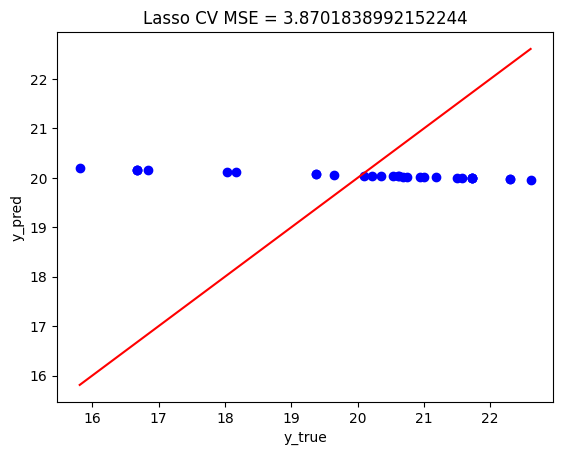

In [24]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Lasso')

# Tree

In [25]:
tree = DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 7, 9, 11],
    'min_samples_leaf':[1, 2]
}

grid = GridSearchCV(tree, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 30 folds for each of 12 candidates, totalling 360 fits
[CV 1/30; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 1/30; 1/12] END max_depth=2, min_samples_leaf=1;, score=-0.001 total time=   0.0s
[CV 2/30; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 2/30; 1/12] END max_depth=2, min_samples_leaf=1;, score=-0.413 total time=   0.0s
[CV 3/30; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 3/30; 1/12] END max_depth=2, min_samples_leaf=1;, score=-0.144 total time=   0.0s
[CV 4/30; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 4/30; 1/12] END max_depth=2, min_samples_leaf=1;, score=-0.309 total time=   0.0s
[CV 5/30; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 5/30; 1/12] END max_depth=2, min_samples_leaf=1;, score=-0.131 total time=   0.0s
[CV 6/30; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 6/30; 1/12] END m

[CV 26/30; 8/12] END max_depth=7, min_samples_leaf=2;, score=-0.024 total time=   0.0s
[CV 27/30; 8/12] START max_depth=7, min_samples_leaf=2..........................
[CV 27/30; 8/12] END max_depth=7, min_samples_leaf=2;, score=-0.364 total time=   0.0s
[CV 28/30; 8/12] START max_depth=7, min_samples_leaf=2..........................
[CV 28/30; 8/12] END max_depth=7, min_samples_leaf=2;, score=-0.000 total time=   0.0s
[CV 29/30; 8/12] START max_depth=7, min_samples_leaf=2..........................
[CV 29/30; 8/12] END max_depth=7, min_samples_leaf=2;, score=-3.164 total time=   0.0s
[CV 30/30; 8/12] START max_depth=7, min_samples_leaf=2..........................
[CV 30/30; 8/12] END max_depth=7, min_samples_leaf=2;, score=-6.150 total time=   0.0s
[CV 1/30; 9/12] START max_depth=9, min_samples_leaf=1...........................
[CV 1/30; 9/12] END max_depth=9, min_samples_leaf=1;, score=-0.063 total time=   0.0s
[CV 2/30; 9/12] START max_depth=9, min_samples_leaf=1.....................

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000015B562D4F90>,
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [26]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 1}

In [ ]:
# Uncomment to get model
# tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=1)

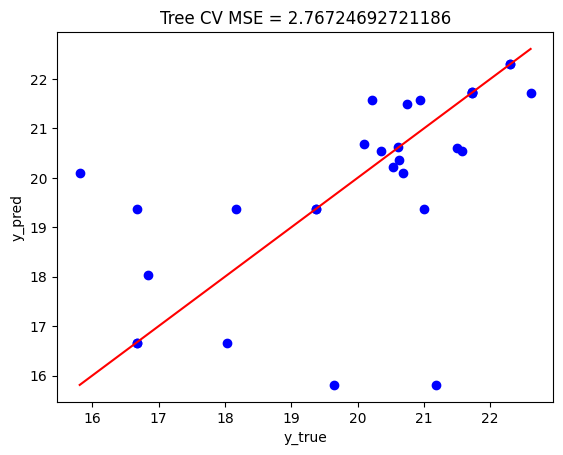

In [27]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Tree')

# RF

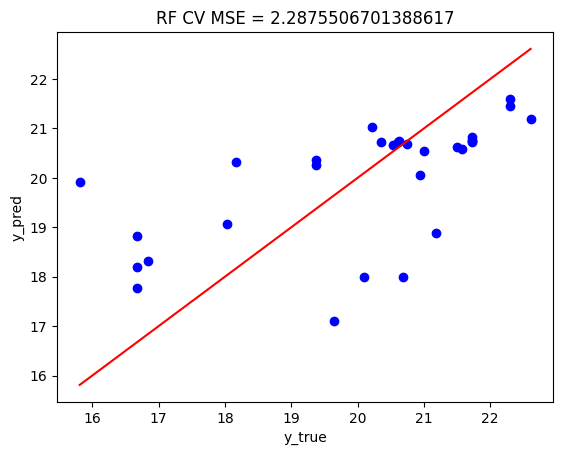

In [28]:
rf = RandomForestRegressor(random_state=42)
cross_validate_and_plot(rf, X, y, cv=lo, metric=mse, title='RF')

# CB

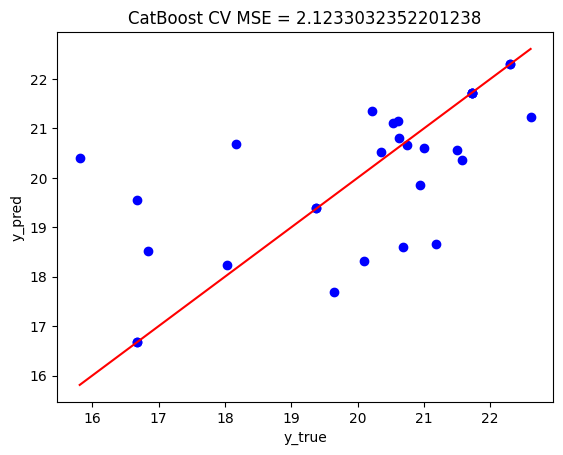

In [29]:
cb = CatBoostRegressor(verbose=0)
cross_validate_and_plot(cb, X, y, cv=lo, metric=mse, title='CatBoost')

In [30]:
dump(cb, 'cb_nd_hcp_a3#2.joblib')

['cb_nd_hcp_a3#2.joblib']